# Learn ML with Meta ML Engineer (Abdullah Al Mamun)
# Day 3 - Data preprocessing, Analysis, and Visualization

In [2]:
# Notebook prepared by Leonardo A.

import sklearn as sl

Dataset: Pima Indians Diabetes Data Set
http://archive.ics.uci.edu/ml/datasets/diabetes

## Extracting and Loading Data

In [1]:
# Loading csv file using Pandas (method we'll use on this notebook)
from pandas import read_csv # Import only this function of Pandas
file = 'pima.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(file, names = columns)
print(df.shape)

(769, 9)


## Exploratory Data Analysis
### Data Preprocessing

### Descriptive Statistics

In [4]:
# Viewing the first 20 lines
df.head(20)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1


In [5]:
df = df.tail(-1) 
df = df.astype(float)

In [6]:
# Viewing dimensions
df.shape

(768, 9)

In [7]:
# Data type of each attribute
df.dtypes

preg     float64
plas     float64
pres     float64
skin     float64
test     float64
mass     float64
pedi     float64
age      float64
class    float64
dtype: object

In [8]:
# Statistical summary
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Distribution of classes
df.groupby('class').size()

class
0.0    500
1.0    268
dtype: int64

# Bring Matplotlib Visualization to Exploratory Analysis

In [10]:
# It may be more interesting to generate the charts in a separate window as it is a set of smaller graphs.
import matplotlib.pyplot as plt

# To be able to generate graphics within this window
%matplotlib inline 

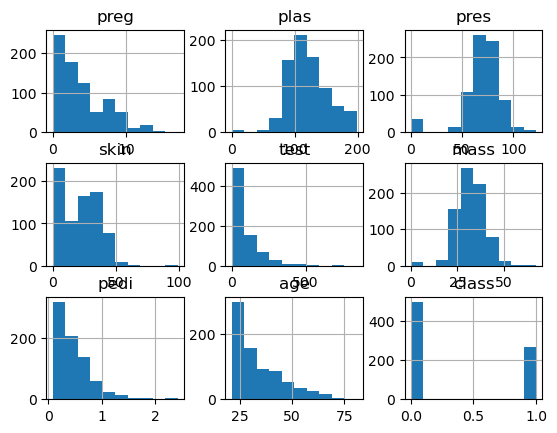

In [11]:
df.hist()
plt.show()

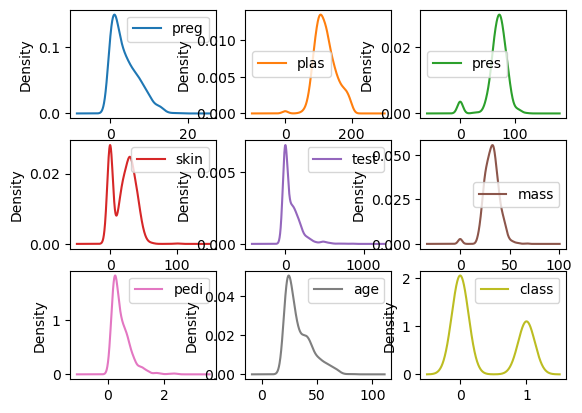

In [12]:
# Density Plot Univariate 'Density'
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

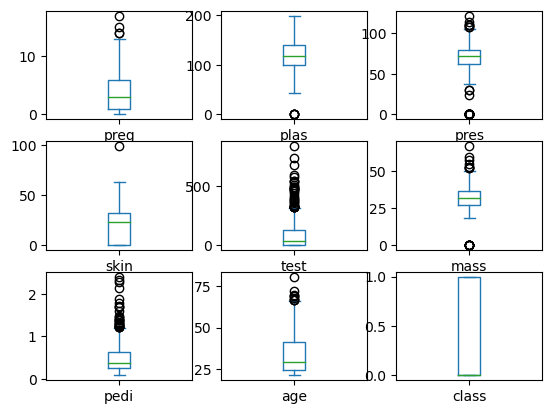

In [13]:
# Box and Whisker Plots
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.show()

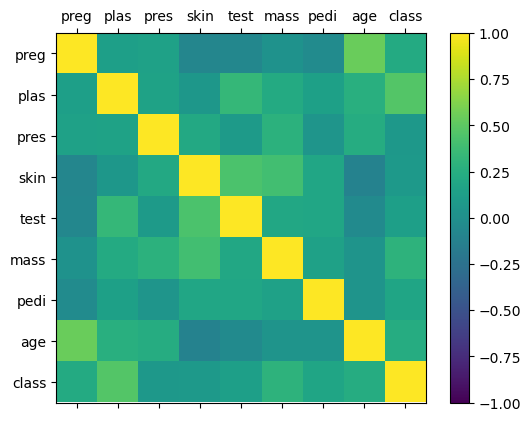

In [14]:
# Correlation matrix with variable names 
correlations = df.corr()

# The correlations variable receives all data correlations

import numpy as np             # Call Numpy
fig = plt.figure ()            # Plot figure
ax = fig.add_subplot (111)     # Add subplot
cax = ax.matshow (correlations, vmin = -1, vmax = 1) # Show correlations in the range of -1 to +1
fig.colorbar (cax)             # Coloring boxplot
ticks = np.arange (0, 9, 1)    # The array defines the size of the 9x9 square to be plotted
ax.set_xticks (ticks)          # Take the size of "ticks" and place it on the x axis
ax.set_yticks (ticks)          # Take the size of "ticks" and place it on the axis
ax.set_xticklabels (columns)   # Apply the columns listed at the beginning as labels
ax.set_yticklabels (columns)   # Applies the columns listed at the beginning as labels
plt.show () # Plot

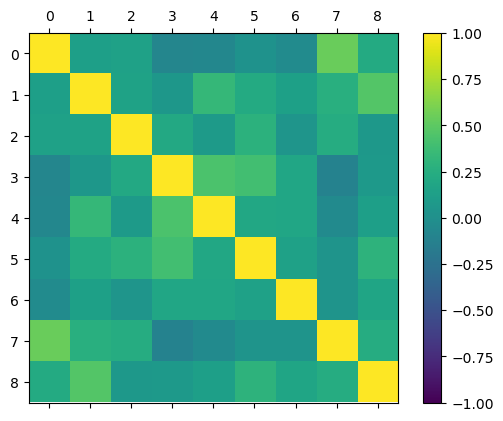

In [15]:
# Simplified generic correlation matrix
correlations = df.corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

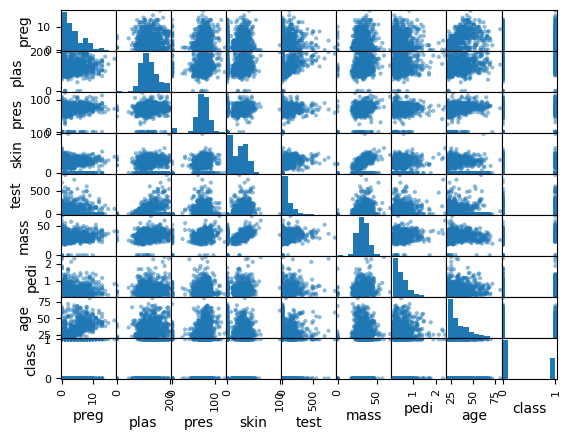

In [16]:
# Scatter Plot 
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

## Viewing with Seaborn
### Widely used for Exploratory Analysis

In [17]:
import seaborn as sns

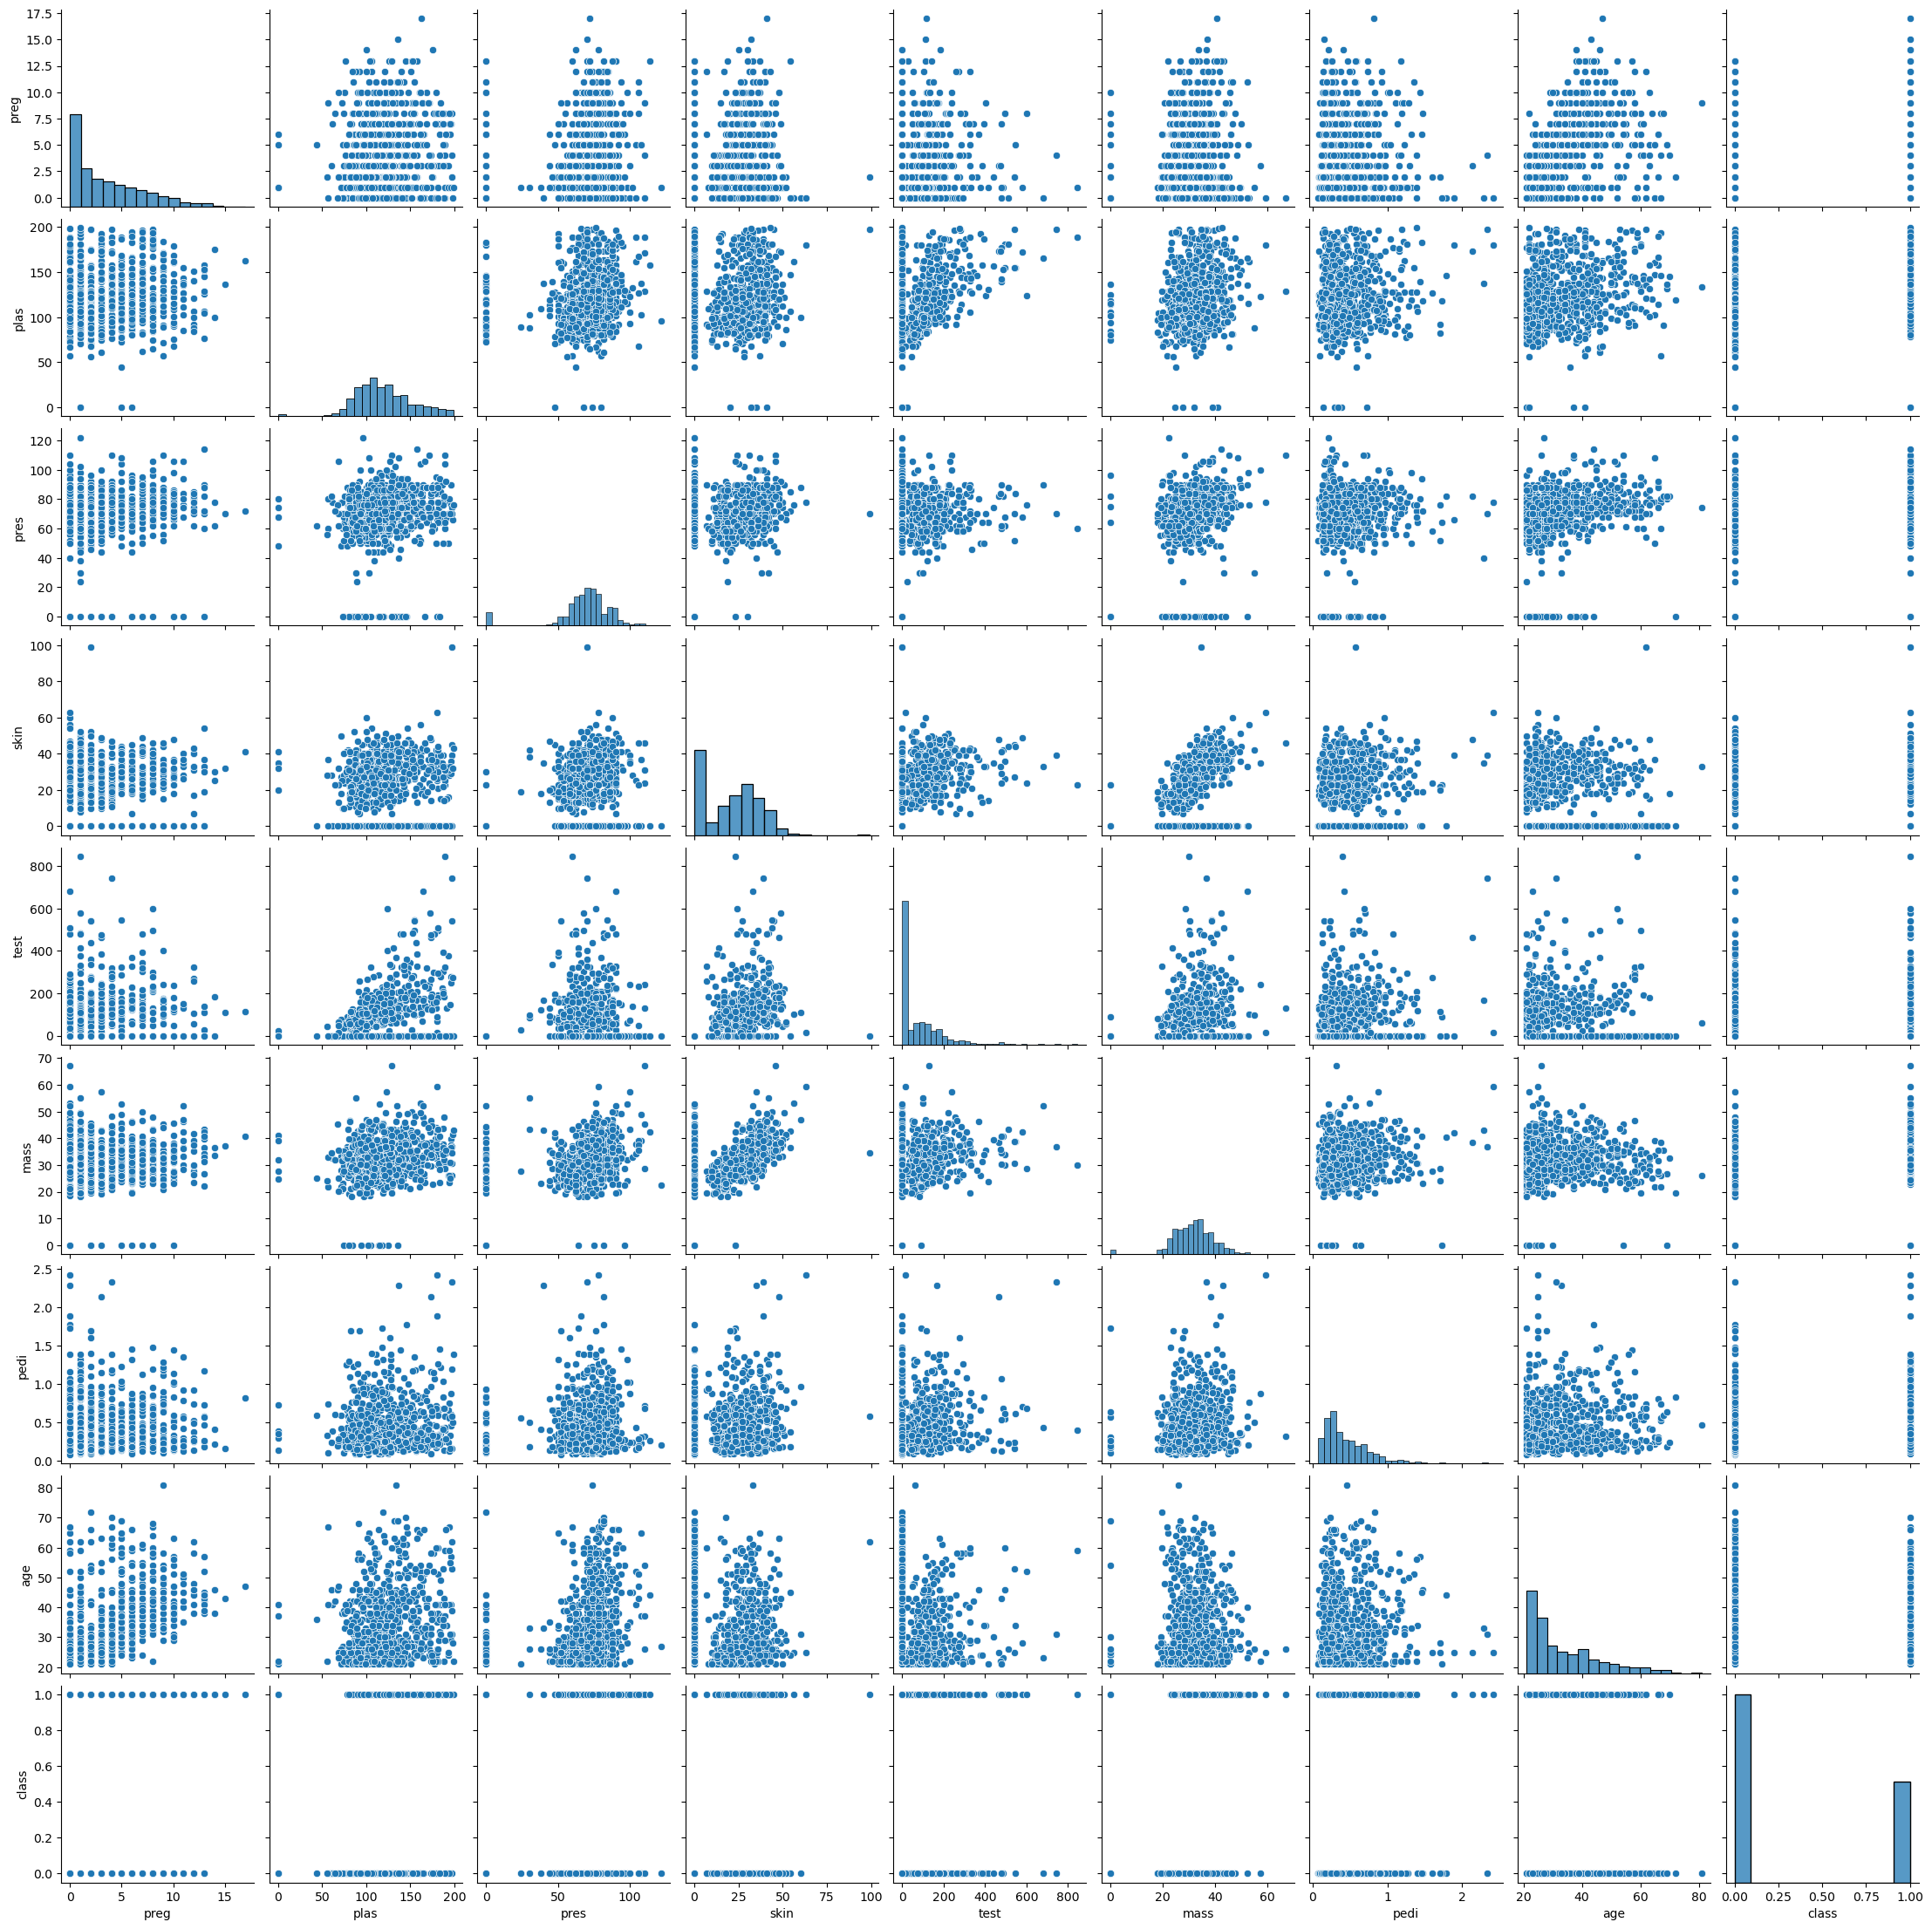

In [18]:
# Pairplot
sns.pairplot(df)

<Axes: >

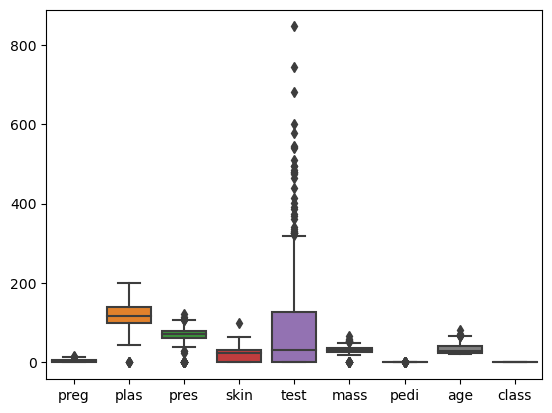

In [19]:
# Boxplot with vertical orientation, variables side by side
# Much simpler parameters
sns.boxplot(data = df, orient = "v")

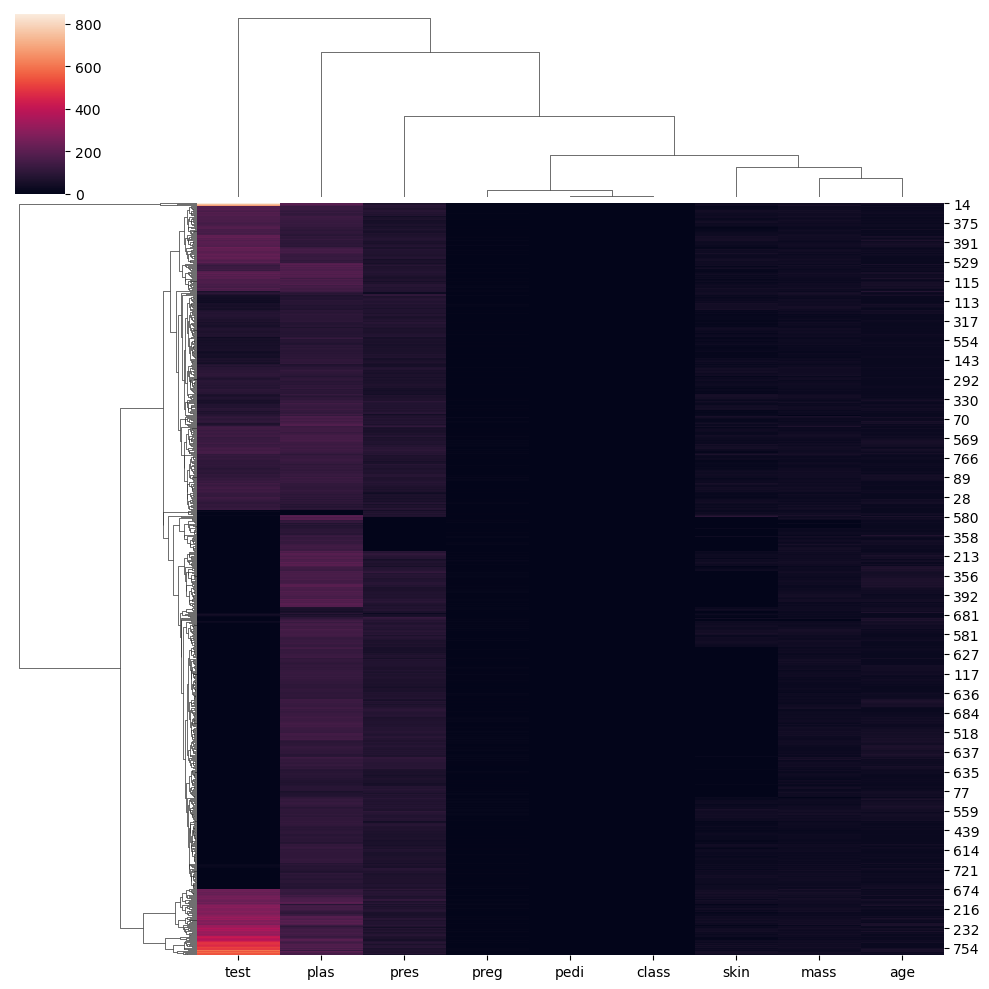

In [20]:
# Clustermap to see how the dataset is organized 
sns.clustermap(df)

In [21]:
df.describe

<bound method NDFrame.describe of      preg   plas  pres  skin   test  mass   pedi   age  class
1     6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0    1.0
2     1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0    0.0
3     8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0    1.0
4     1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0    0.0
5     0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0    1.0
..    ...    ...   ...   ...    ...   ...    ...   ...    ...
764  10.0  101.0  76.0  48.0  180.0  32.9  0.171  63.0    0.0
765   2.0  122.0  70.0  27.0    0.0  36.8  0.340  27.0    0.0
766   5.0  121.0  72.0  23.0  112.0  26.2  0.245  30.0    0.0
767   1.0  126.0  60.0   0.0    0.0  30.1  0.349  47.0    1.0
768   1.0   93.0  70.0  31.0    0.0  30.4  0.315  23.0    0.0

[768 rows x 9 columns]>

/var/folders/nq/6jqx16fn56j4y376c_jynsdh0000gn/T/ipykernel_79453/1012430573.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.pedi, fit = stats.norm);


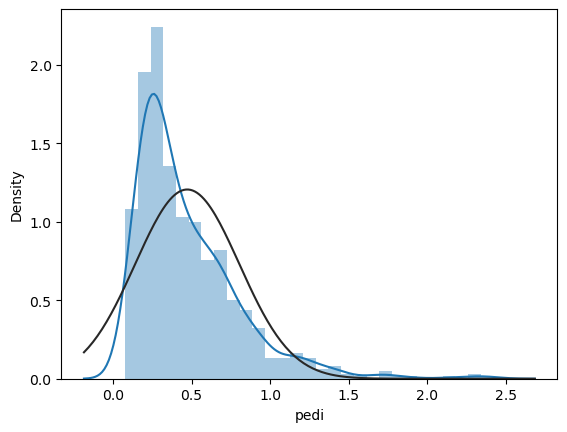

In [22]:
from scipy import stats
sns.distplot(df.pedi, fit = stats.norm);

## Preparing the Data for Machine Learning

## Normalization - Method 1 (Same Scale)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [24]:
# Transforming data to the same scale (between 0 and 1)
# Importing MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler 

array = df.values # Take the data and place it in an objectc called array 

# Separating the array into input (X) and output (Y) components

# The dataset has 9 columns, the first 8 of which are predictors.
X = array [:, 0: 8] 

# The last column is the target class
Y = array [:, 8] 

# Generating the new scale (normalizing the data)
scaler = MinMaxScaler (feature_range = (0, 1))

# Fit for predictor variables
rescaledX = scaler.fit_transform (X) 

# Summarizing the transformed data
print ("Original Data: \ n \ n", df.values)
print ("\ nStandardized Data: \ n \ n", rescaledX [0: 5 ,:])

Original Data: \ n \ n [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
\ nStandardized Data: \ n \ n [[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


## The Normalized data still represents the same information, BUT on a different scale.


### Normalization - Method 2 (Same Data Scale)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

In [26]:
# Normalizing the data leaving them with a length equal to 1
from sklearn.preprocessing import Normalizer

array = df.values

# Separating the array into input and output components
X = array[:,0:8]
Y = array[:,8]

# Generating normalized data
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# Sumarizing the transformed data
print("Original data: \n\n", df.values)
print("\nNormalized data: \n\n", normalizedX[0:5,:])

Original data: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Normalized data: 

 [[0.03355237 0.82762513 0.40262844 0.19572216 0.         0.18789327
  0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 0.24429612 0.         0.22407851
  0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 0.         0.         0.11765825
  0.00339341 0.16159073]
 [0.00661199 0.58846737 0.43639153 0.15207584 0.62152733 0.185797
  0.0011042  0.13885185]
 [0.         0.5963863  0.17412739 0.15236146 0.73133502 0.18762226
  0.00996009 0.14365509]]


## Standardization (Normal Distribution)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [28]:
# Standardizing the data (0 for the mean, 1 for the standard deviation)

# Importing modules
from pandas import read_csv
from sklearn.preprocessing import StandardScaler

array = df.values

# Separating the array into input and output components
X = array[:,0:8]
Y = array[:,8]

# Generating the new standard
scaler = StandardScaler().fit(X) # Applying the Standardization function 
standardX = scaler.transform(X)  # Applying to predictor variables

# Sumarizing the transformed data
print("Original Data: nn", df.values)
print("nStandardized Data: nn", standardX[0:5,:])


Original Data: nn [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
nStandardized Data: nn [[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


## Binarization (Transform data into 1 or 0)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html

In [29]:
# Binarization

# Importing of modules
from pandas import read_csv
from sklearn.preprocessing import Binarizer

array = df.values

# Separating the array into input and output components
X = array[:,0:8]
Y = array[:,8]

# Generating binarization
binarizer = Binarizer (threshold = 0.2).fit(X)
binaryX = binarizer.transform(X)

# Sumarizing the transformed data
print("Original Data:", df.values)
print("nBinarized Data:", binaryX[0:5,:])

Original Data: [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
nBinarized Data: [[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]
